# Avocado Squad

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

<ul>
    <li>Date - The date of the observation</li>
    <li>AveragePrice - the average price of a single avocado</li>
    <li>type - conventional or organic</li>
    <li>year - the year</li>
    <li>Region - the city or region of the observation</li>
    <li>Total Volume - Total number of avocados sold</li>
    <li>4046 - Total number of avocados with PLU 4046 sold</li>
    <li>4225 - Total number of avocados with PLU 4225 sold</li>
    <li>4770 - Total number of avocados with PLU 4770 sold</li>
    </ul>
    

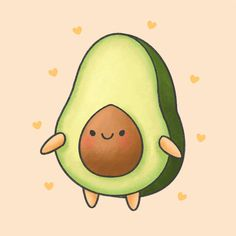

In [1]:
# import libraries 
import numpy as np 
import pandas as pd 

In [2]:
# import the data required 
data = pd.read_csv('avocado.csv')
data.head(8)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In addition to eyeballing our data with head, info helps give us a sense of the datatype in each slide, and null values we may have to deal with. Oh and speaking of nulls...

In [4]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Happiness! No imputation needed. 

Let's do a quick aside on time...

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


## Exercise 1: Let's build a Predictive model of Average Price! 

### Step 1. Copy your labels into a separate array!

In [6]:
y = data['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

### Step 2. Drop all features you're not using (including your labels, from your dataframe)

In [7]:
x = data.drop(['Date', 'AveragePrice'], axis=1)
x

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
Unnamed: 0      18249 non-null int64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(8), int64(2), object(2)
memory usage: 1.7+ MB


### Step 3. Pipeline your features, specifically implementing your plans for your numeric and categorical features.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
avocado_num = x.drop(['region', 'type'], axis=1) 

# remove categorical features from the numeric values

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

avocado_num_tr = num_pipeline.fit_transform(avocado_num)
numerical_features = list(avocado_num)
categorical_features = ['region', 'type']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto'), categorical_features),
    ])

avocado_prepared = full_pipeline.fit_transform(data).toarray()

In [10]:
avocado_prepared

array([[-1.5653269 , -0.22771641, -0.23081597, ...,  0.        ,
         1.        ,  0.        ],
       [-1.50073001, -0.23042664, -0.23110251, ...,  0.        ,
         1.        ,  0.        ],
       [-1.43613312, -0.21208462, -0.23100731, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.98395486, -0.24233073, -0.2306933 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.91935797, -0.24162464, -0.2304279 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.85476108, -0.24125273, -0.22934712, ...,  1.        ,
         0.        ,  1.        ]])

### Step 4. Split your data!

In [11]:
# create training and testing vars
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(avocado_prepared, y, test_size=0.2)

In [12]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14599, 66) (14599,)
(3650, 66) (3650,)


### Step 5 and 6. Train and then Test your data!

In [13]:
from sklearn.linear_model import LinearRegression


# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [14]:
predictions.shape

(3650,)

### Step 7. Score your data!

In [15]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("%-12s %f" % ('MSE:', mean_squared_error(y_test, predictions)))
print("%-12s %f" % ('RMSE:', np.sqrt(mse)))

MSE:         0.068802
RMSE:        0.262301


## Exercise 2: Let's now try to Classify by Type of Avocado! 

In [16]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


If we're going to classify by type of Avocado, it would be good to know how many types we're dealing with. Let's take a look!

In [17]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

Now let's replicate our previous process flow, only this time let's extract 'Type' as our labels and keep 'AvgPrice' as a feature in our training set.

### Step 1.

In [18]:
new_y = data['type']
new_y

0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object

### Step 2.

In [19]:
new_x = data.drop(['Date', 'type'], axis=1)
new_x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico


### Step 3.

In [20]:
new_avocado_num = new_x.drop(['region'], axis=1) 

# remove categorical features from the numeric values

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

new_avocado_num_tr = num_pipeline.fit_transform(new_avocado_num)
numerical_features = list(new_avocado_num)
categorical_features = ['region']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto'), categorical_features),
    ])

new_avocado_prepared = full_pipeline.fit_transform(new_x).toarray()

In [21]:
new_avocado_prepared

array([[-1.5653269 , -0.18868864, -0.22771641, ...,  0.        ,
         0.        ,  0.        ],
       [-1.50073001, -0.13901962, -0.23042664, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43613312, -1.18206895, -0.21208462, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.98395486,  1.15237477, -0.24233073, ...,  0.        ,
         0.        ,  1.        ],
       [-0.91935797,  1.30138182, -0.24162464, ...,  0.        ,
         0.        ,  1.        ],
       [-0.85476108,  0.53151208, -0.24125273, ...,  0.        ,
         0.        ,  1.        ]])

### Step 3.5. 

Since our labels are categories, we have to transform them too. To accomplish this, we're going to use Label Encoder. Why aren't we OneHotEncoding this?

In [22]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
new_y = le.fit_transform(new_y) 
new_y

array([0, 0, 0, ..., 1, 1, 1])

### Step 4.

In [23]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_avocado_prepared, new_y, test_size=0.2)

In [24]:
print (new_X_train.shape, new_y_train.shape)
print (new_X_test.shape, new_y_test.shape)

(14599, 65) (14599,)
(3650, 65) (3650,)


### Steps 5, 6, and 7

In [25]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [26]:
# Logistic Regression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(new_X_train, new_y_train)
predicted = log_reg.predict(new_X_test)
score = log_reg.predict_proba(new_X_test)[:,1]

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))

Accuracy:    0.982192
